In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/BTC-USD.csv')

data = data.drop(labels=range(364, 366), axis=0)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,57200.292969,5.171314e+10
1,2021-05-04,57214.179688,57214.179688,53191.425781,53333.539063,53333.539063,6.856471e+10
2,2021-05-05,53252.164063,57911.363281,52969.054688,57424.007813,57424.007813,6.924132e+10
3,2021-05-06,57441.308594,58363.316406,55382.507813,56396.515625,56396.515625,6.952329e+10
4,2021-05-07,56413.953125,58606.632813,55321.847656,57356.402344,57356.402344,6.843402e+10
...,...,...,...,...,...,...,...
359,2022-04-27,38120.300781,39397.917969,37997.312500,39241.121094,39241.121094,3.098102e+10
360,2022-04-28,39241.429688,40269.464844,38941.421875,39773.828125,39773.828125,3.390370e+10
361,2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,3.088299e+10
362,2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,2.389571e+10


In [2]:
y = data['Close'].values
data=data.drop(columns = ['Close', 'Date'])
X = data.values

In [3]:

y=y.reshape(-1, 1)


import numpy as np
X=np.concatenate((X[1:], y[0:-1]), axis=1)

In [2]:
pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=3470594a4c2fb2b27337520ad3bf565086fffd02bc29ab78f675390d592bd281
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-self-attention


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [5]:
pip install pyrcn

In [6]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y[1:], test_size=0.2, shuffle=False, random_state=42)


In [ ]:
x_train1.shape

(290, 6)

In [7]:
from pyrcn.base.blocks import InputToNode
from sklearn . datasets import make_blobs
# Generate a toy dataset

In [8]:
input_to_node = InputToNode (50, input_activation='relu',input_scaling =1.0 )


x_train= input_to_node.fit_transform (x_train1)
x_test= input_to_node.transform (x_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:77: FutureWarning: Pass hidden_layer_size=50 as keyword args. From version 1.1 (renaming of 0.26) passing these as positional arguments will result in an error
  FutureWarning,


In [9]:
from pyrcn.base.blocks import NodeToNode
node_to_node = NodeToNode (50, reservoir_activation='relu', spectral_radius =1.0 , leakage =0.5 ,bidirectional = False )
x_train=node_to_node . fit_transform(x_train)
x_test= node_to_node.transform (x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:77: FutureWarning: Pass hidden_layer_size=50 as keyword args. From version 1.1 (renaming of 0.26) passing these as positional arguments will result in an error
  FutureWarning,


In [10]:
a=x_test[0]
for i in range(1, len(x_test)):
    b=x_test[i].copy()

    x_test[i]=a
    a=b.copy()

x_test[0]=x_train[-1]
x_train1=x_train1[1:]
y_train1=y_train1[1:]

x_train=x_train[:-1]




In [11]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

x_train1 = x_train1.reshape((x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = x_test1.reshape((x_test1.shape[0], x_test1.shape[1], 1))

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [14]:
from keras_self_attention import SeqSelfAttention
def build_model(
    input_shapey,
    input_shapez,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputsy = keras.Input(shape=input_shapey)
    inputsz = keras.Input(shape=input_shapez)
    y = inputsy
    z= inputsz

    #z=layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(z)

    #y=layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(y)

    z=SeqSelfAttention()(z)
    #z=layers.Flatten()(z)
    z=layers.Dense(50, activation="tanh")(z)
    z=layers.Dense(5, activation="tanh")(z)
    z= layers.Reshape((-1,1))(z)
    #y=SeqSelfAttention()(y)



    x=layers.Concatenate(axis=1)([y, z])
    #x=layers.Add()([inputsy, inputsz])

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    #outputs = layers.Dense(5, activation="softmax")(x)
    outputs = layers.Dense(1)(x)
    return keras.Model([inputsy,inputsz], outputs)

In [15]:
input_shapey = x_train1.shape[1:]
input_shapez = x_train.shape[1:]

model = build_model(
    input_shapey,
    input_shapez,
    head_size=5,
    num_heads=2,
    ff_dim=2,
    num_transformer_blocks=2,
    mlp_units=[64],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_absolute_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    metrics=["mean_absolute_error"],
)
'''
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["sparse_categorical_accuracy"],
)
'''
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 1)]      0           []                               
                                                                                                  
 seq_self_attention (SeqSelfAtt  (None, 50, 1)       129         ['input_2[0][0]']                
 ention)                                                                                          
                                                                                                  
 dense (Dense)                  (None, 50, 50)       100         ['seq_self_attention[0][0]']     
                                                                                                  
 dense_1 (Dense)                (None, 50, 5)        255         ['dense[0][0]']              

In [239]:
model.compile(
    loss="mean_absolute_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    metrics=["mean_absolute_error"],
)
callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

history=model.fit(
    [x_train1,x_train],
    y_train1,
    validation_data=([x_test1, x_test], y_test1),
    epochs=2000,
    batch_size=128,
    callbacks=callbacks,
)

Epoch 1/2000
3/3 [==============================] - 4s 317ms/step - loss: 4867.4272 - mean_absolute_error: 4867.4272 - val_loss: 457.5338 - val_mean_absolute_error: 457.5338
Epoch 2/2000
3/3 [==============================] - 0s 33ms/step - loss: 4915.4707 - mean_absolute_error: 4915.4707 - val_loss: 733.6655 - val_mean_absolute_error: 733.6655
Epoch 3/2000
3/3 [==============================] - 0s 37ms/step - loss: 4651.1426 - mean_absolute_error: 4651.1426 - val_loss: 739.8160 - val_mean_absolute_error: 739.8160
Epoch 4/2000
3/3 [==============================] - 0s 35ms/step - loss: 4943.0020 - mean_absolute_error: 4943.0020 - val_loss: 527.2123 - val_mean_absolute_error: 527.2123
Epoch 5/2000
3/3 [==============================] - 0s 33ms/step - loss: 4620.6079 - mean_absolute_error: 4620.6079 - val_loss: 523.6831 - val_mean_absolute_error: 523.6831
Epoch 6/2000
3/3 [==============================] - 0s 34ms/step - loss: 5005.1753 - mean_absolute_error: 5005.1753 - val_loss: 556.93

In [242]:
#testing prediction

#testing prediction
ypred=model.predict([x_test1, x_test])
#testing prediction

#testing prediction

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance
print('mse: ', mean_squared_error(ypred, y_test1))
print('mae: ', mean_absolute_error(ypred, y_test1))
print('r2_score: ', r2_score(ypred, y_test1))
print('explained_variance_score: ', explained_variance_score(ypred, y_test1))
print('max_error: ', max_error(ypred, y_test1))
#print('mean_squared_log_error: ', mean_squared_log_error(ypred, y_test1))
print('mean_poisson_deviance: ', r2_score(ypred, y_test1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(ypred, y_test1))


mse:  74800.5584197234
mae:  211.62601665753476
r2_score:  0.989486712599751
explained_variance_score:  0.9896472082447939
max_error:  942.875
mean_poisson_deviance:  0.989486712599751


In [231]:
#training prediction
xpred=model.predict([x_train1, x_train])
print('mse: ', mean_squared_error(xpred, y_train1))
print('mae: ', mean_absolute_error(xpred, y_train1))
print('r2_score: ', r2_score(xpred, y_train1))
print('explained_variance_score: ', explained_variance_score(xpred, y_train1))
print('max_error: ', max_error(xpred, y_train1))
#print('mean_squared_log_error: ', mean_squared_log_error(xpred, y_train1))
print('mean_poisson_deviance: ', r2_score(xpred, y_train1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(xpred, y_train1))

mse:  158651.08131254115
mae:  310.91811746366756
r2_score:  0.9980530496355495
explained_variance_score:  0.9981198867103122
max_error:  1638.691406500002
mean_poisson_deviance:  0.9980530496355495


In [217]:
final_pred = []
real=[]
for i in range(len(xpred)):
    final_pred.append(xpred[i][0])
    real.append(y_train1[i][0])

for i in range(len(ypred)):
    final_pred.append(ypred[i][0])
    real.append(y_test1[i][0])

In [218]:
xx=[]
for i in range(len(final_pred)):
    xx.append(i)

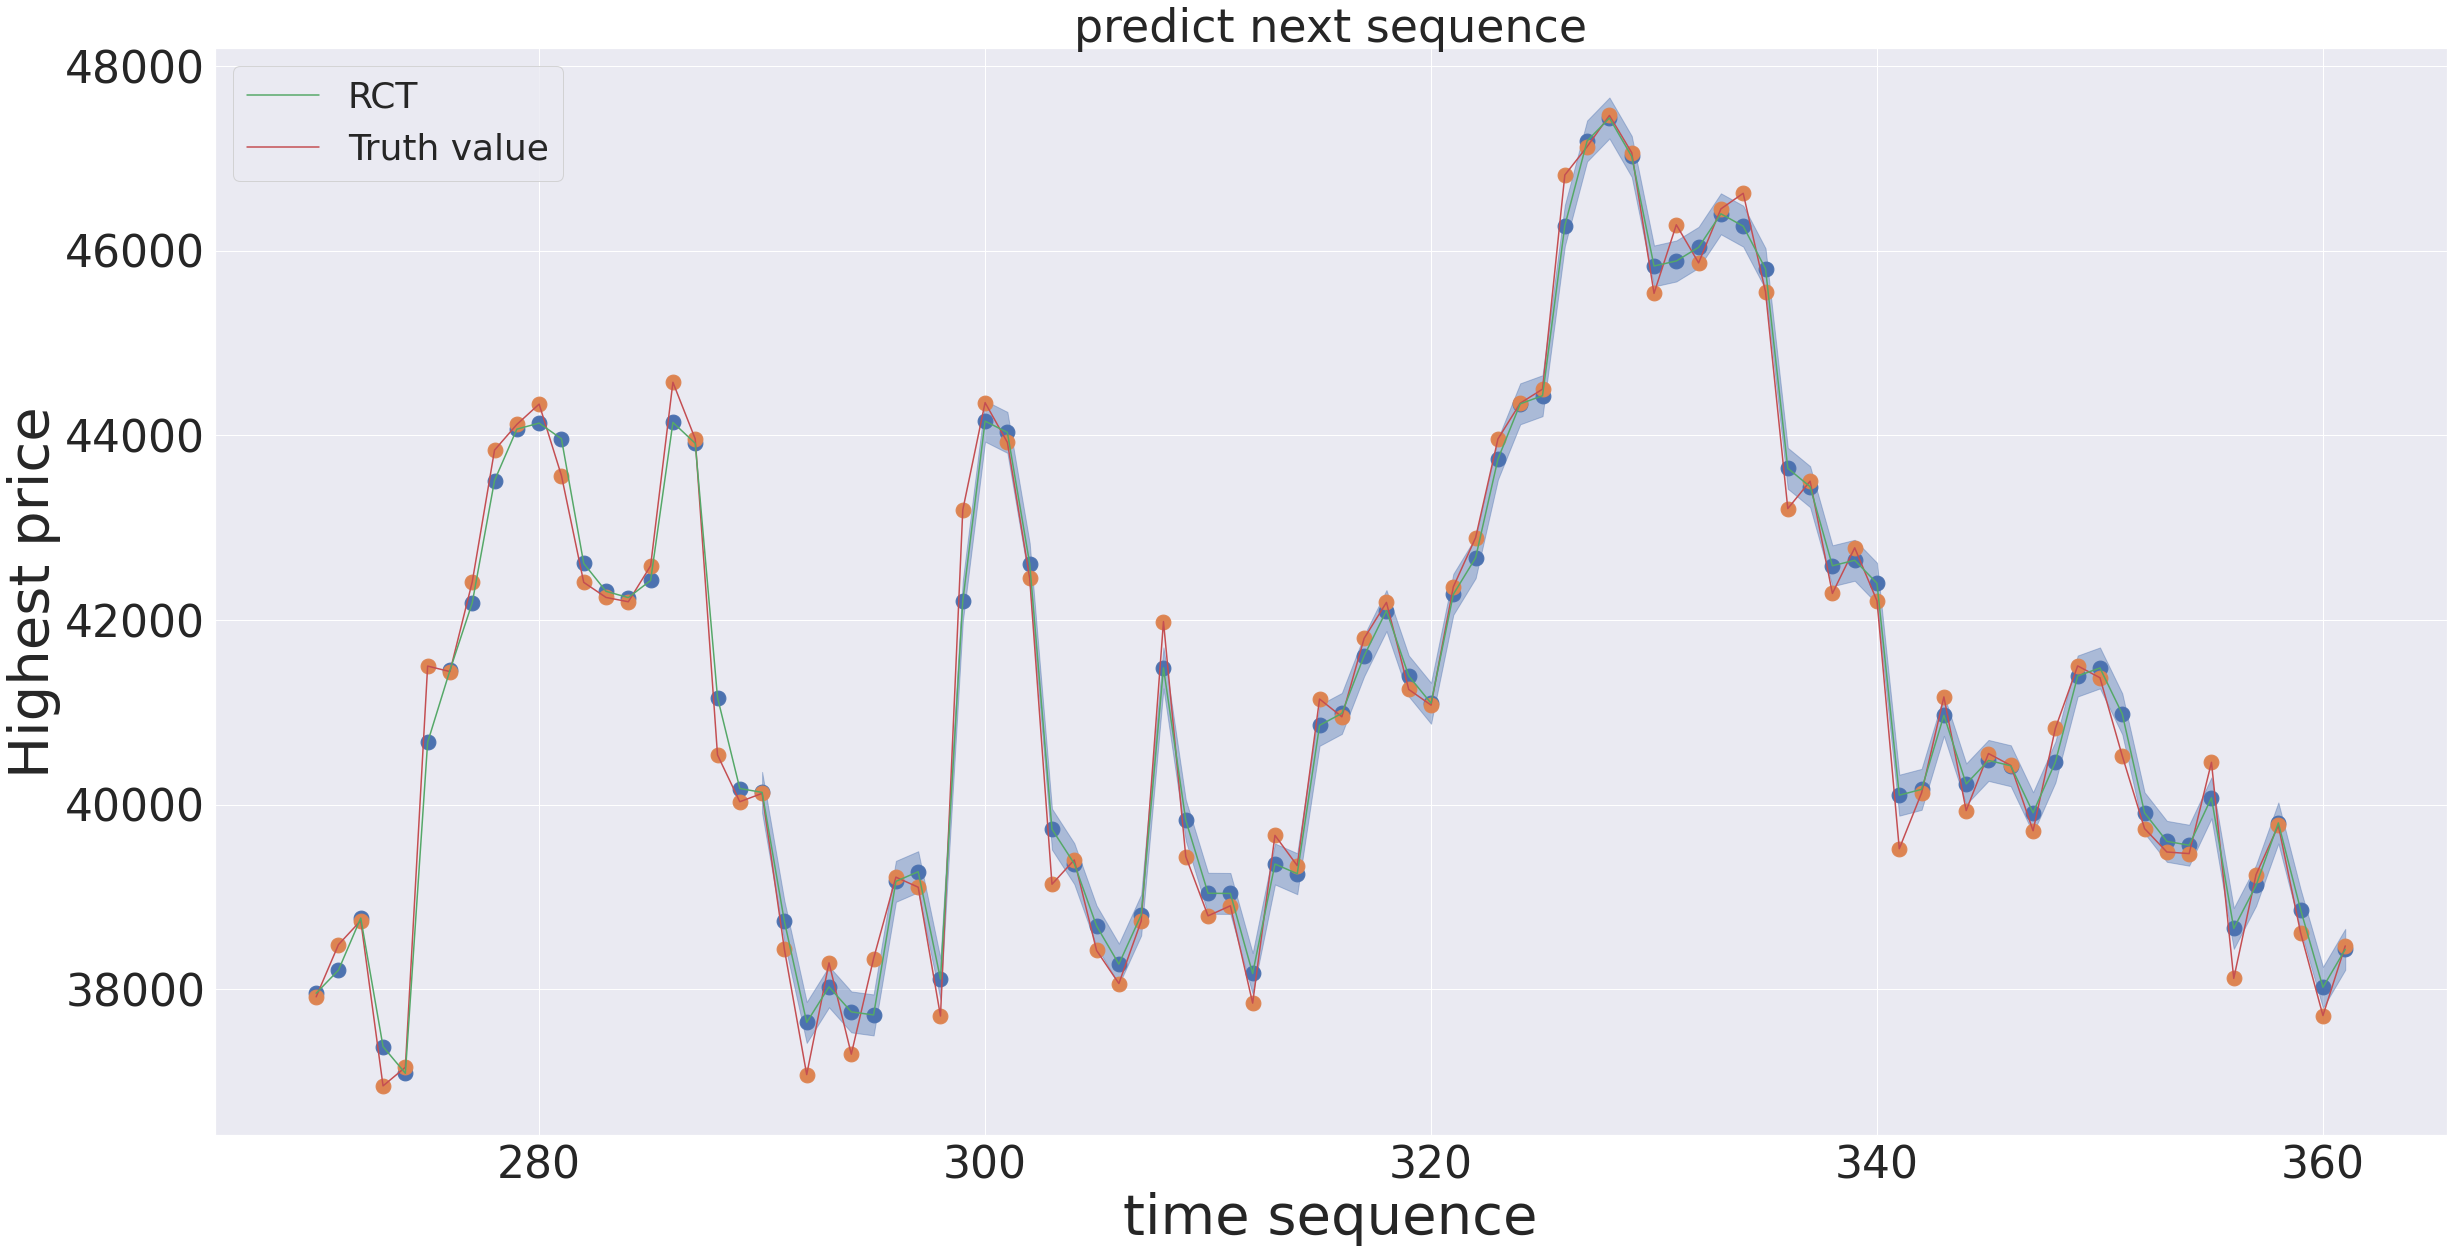

In [219]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=270
j=362
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],final_pred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],real[i:j], color='r', label='Truth value')

plt.scatter(xx[i:j],final_pred[i:j],  s=220, zorder=2)
plt.scatter(xx[i:j],real[i:j],  s=220, zorder=2)
ci = 1200.960 * np.std(final_pred)/np.mean(final_pred)
plt.fill_between(xx[362-72:j], final_pred[362-72:j]-ci, final_pred[362-72:j]+ci, color='b', alpha=.4)

#ax.fill_between(xx[i:j], ypred[i:j], ypred[i:j], color='b', alpha=.1)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

In [220]:
import csv
  
rows=[]
for i in range(len(final_pred)):
    rows.append([final_pred[i], real[i]])  
# field names 
fields = ['predict', 'truth'] 
    

  
with open('RCT_BTC-USD.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(rows)

In [221]:
rows

[[56422.2, 57424.007813],
 [56347.48, 56396.515625],
 [56968.527, 57356.402344],
 [58321.285, 58803.777344],
 [57751.246, 58232.316406],
 [55945.543, 55859.796875],
 [56052.246, 56704.574219],
 [50724.375, 49150.535156],
 [49437.016, 49716.191406],
 [49912.3, 49880.535156],
 [47451.242, 46760.1875],
 [46572.18, 46456.058594],
 [43863.875, 43537.511719],
 [43474.62, 42909.402344],
 [36974.203, 37002.441406],
 [40131.875, 40782.738281],
 [37571.965, 37304.691406],
 [37502.92, 37536.632813],
 [34851.086, 34770.582031],
 [38323.38, 38705.980469],
 [38419.734, 38402.222656],
 [39475.727, 39294.199219],
 [38680.695, 38436.96875],
 [36274.5, 35697.605469],
 [35156.21, 34616.066406],
 [35538.047, 35678.128906],
 [36840.285, 37332.855469],
 [36868.33, 36684.925781],
 [37509.26, 37575.179688],
 [38974.566, 39208.765625],
 [37189.402, 36894.40625],
 [36047.04, 35551.957031],
 [36039.71, 35862.378906],
 [34381.95, 33560.707031],
 [33277.38, 33472.632813],
 [36569.676, 37345.121094],
 [37009.574, 3